Dimensions of the dataset: (54808, 13)

Summary Statistics:
         employee_id         department    region   education gender  \
count   54808.000000              54808     54808       52399  54808   
unique           NaN                  9        34           4      2   
top              NaN  Sales & Marketing  region_2  Bachelor's      m   
freq             NaN              16840     12343       36668  38496   
mean    39195.830627                NaN       NaN         NaN    NaN   
std     22586.581449                NaN       NaN         NaN    NaN   
min         1.000000                NaN       NaN         NaN    NaN   
25%     19669.750000                NaN       NaN         NaN    NaN   
50%     39225.500000                NaN       NaN         NaN    NaN   
75%     58730.500000                NaN       NaN         NaN    NaN   
max     78298.000000                NaN       NaN         NaN    NaN   

       recruitment_channel  no_of_trainings    age  previous_year_rating  \

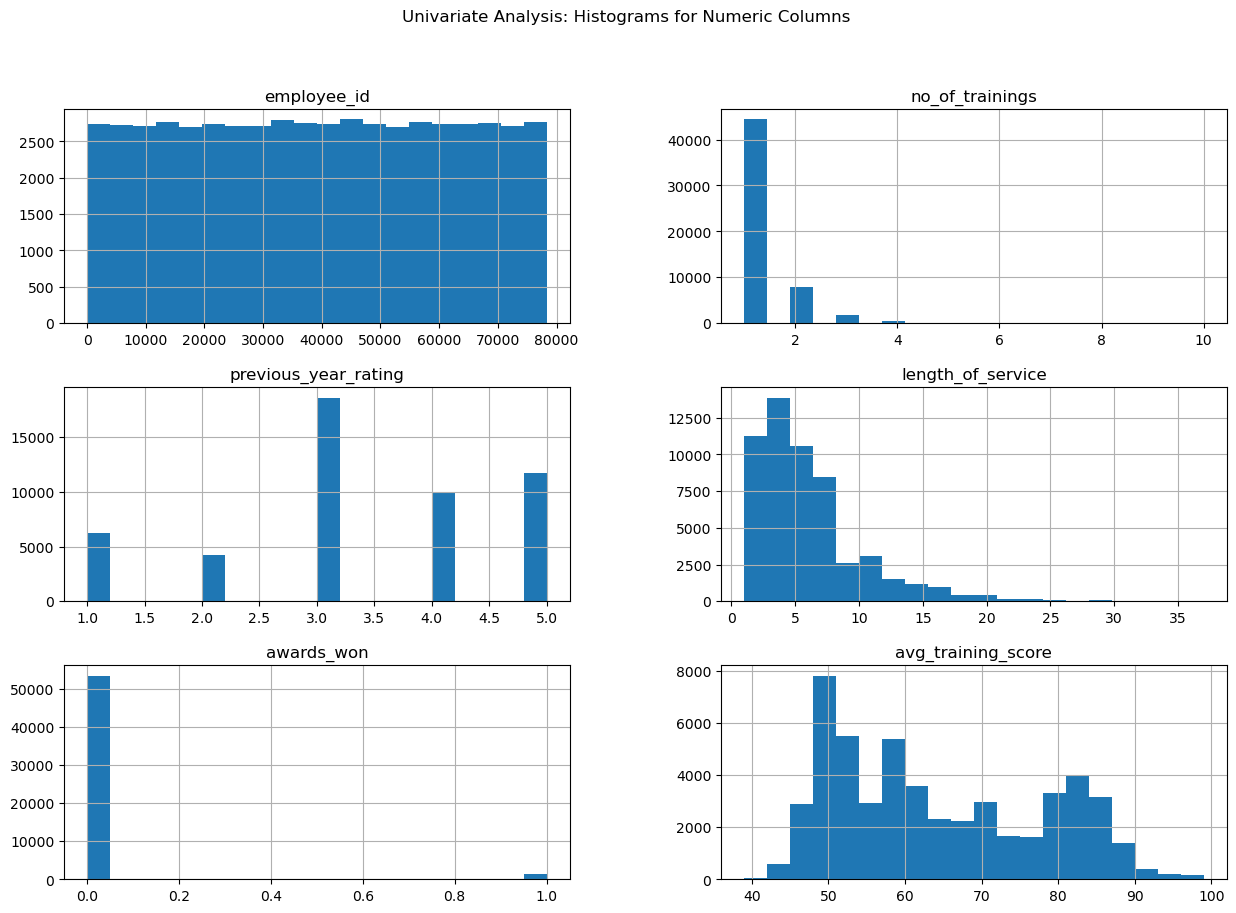

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/employee_promotion.csv'
data = pd.read_csv(url)

data.head()

print("Dimensions of the dataset:", data.shape)

# Summary statistics of the dataset
summary = data.describe(include='all')
print("\nSummary Statistics:")
print(summary)

data.hist(bins=20, figsize=(15, 10))
plt.suptitle("Univariate Analysis: Histograms for Numeric Columns")
plt.show()